# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning || **Author**: Maryam Asgarinezhad</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [ ]:
!pip install scikit-plot

In [ ]:
!pip freeze | grep scipy

scipy==1.11.4


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2

## Load Dataset

In [ ]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data
!proxychains kaggle datasets download -d mojtabanafez/rayan-homework1

ProxyChains-3.1 (http://proxychains.sf.net)
|DNS-request| www.kaggle.com 
|S-chain|-<>-127.0.0.1:2080-<><>-4.2.2.2:53-<><>-OK
|DNS-response| www.kaggle.com is 35.244.233.98
|S-chain|-<>-127.0.0.1:2080-<><>-35.244.233.98:443-<><>-OK
Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
|DNS-request| storage.googleapis.com 
|S-chain|-<>-127.0.0.1:2080-<><>-4.2.2.2:53-<><>-OK
|DNS-response| storage.googleapis.com is 142.251.31.207
|S-chain|-<>-127.0.0.1:2080-<><>-142.251.31.207:443-<><>-OK
rayan-homework1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip ./rayan-homework1.zip

Archive:  ./rayan-homework1.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('./creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
X.shape, y.shape

((284807, 30), (284807,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [ ]:
summary_statistics = df.describe()

from IPython.display import display

display(summary_statistics)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


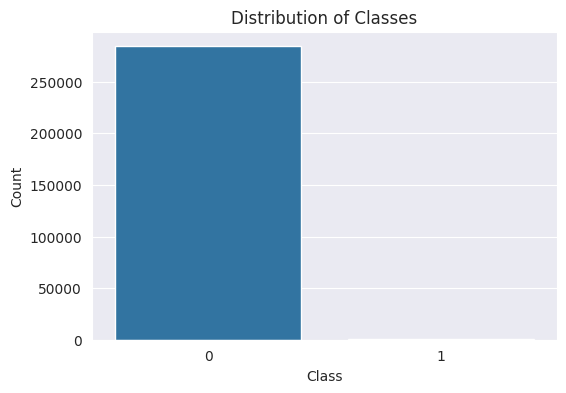

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
class_distribution = df['Class'].value_counts(normalize=True) * 100

# Convert to DataFrame for better display
class_distribution_df = class_distribution.reset_index()
class_distribution_df.columns = ['Class', 'Proportion']

# Display the DataFrame
print("Class Distribution:")
print(class_distribution_df)

Class Distribution:
   Class  Proportion
0      0   99.827251
1      1    0.172749


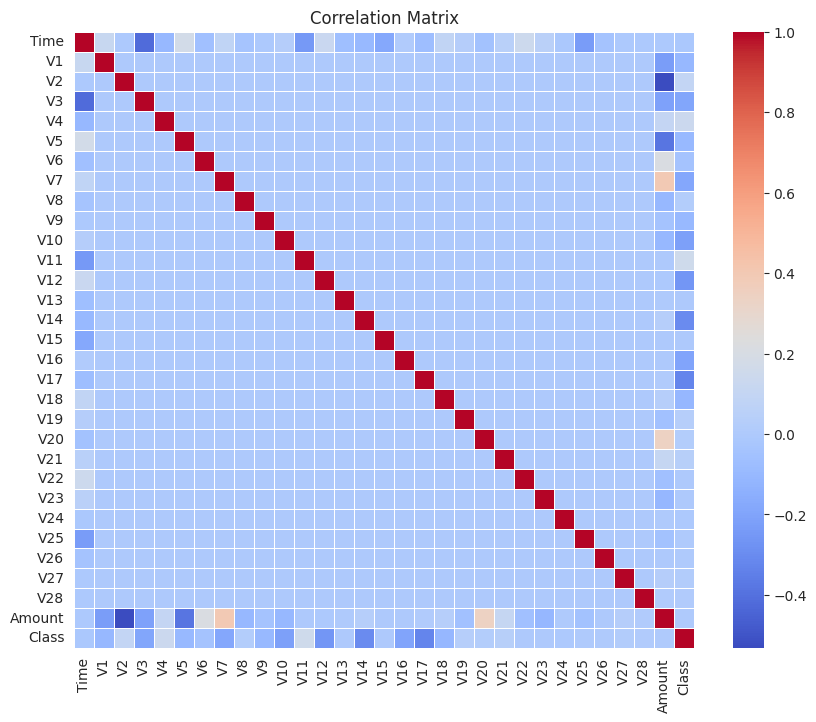

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


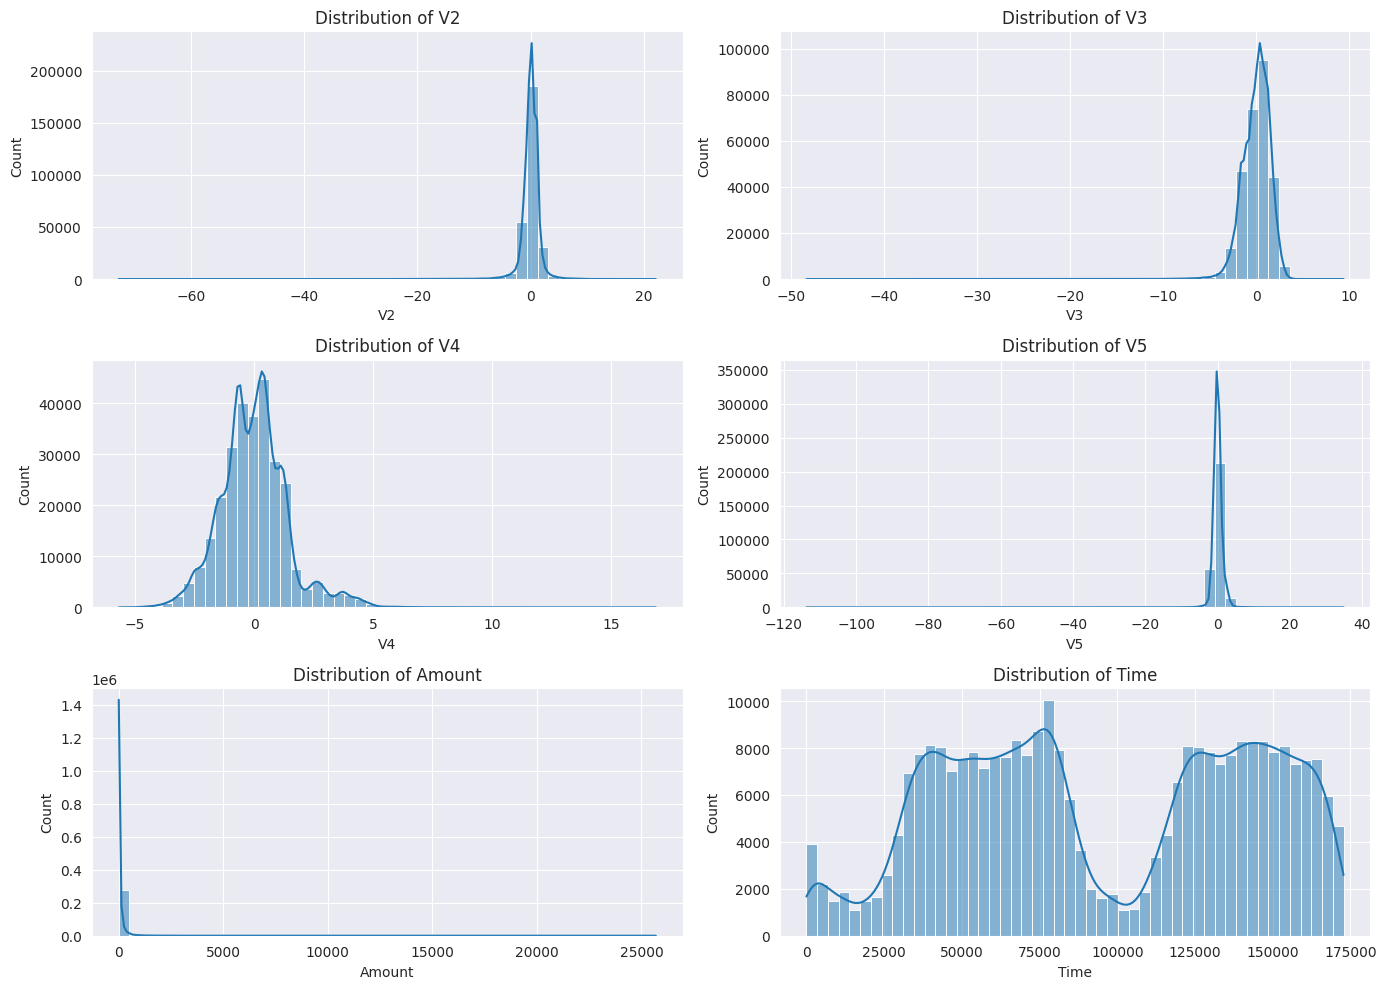

In [ ]:
selected_features = ['V2', 'V3', 'V4', 'V5', 'Amount', 'Time']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()



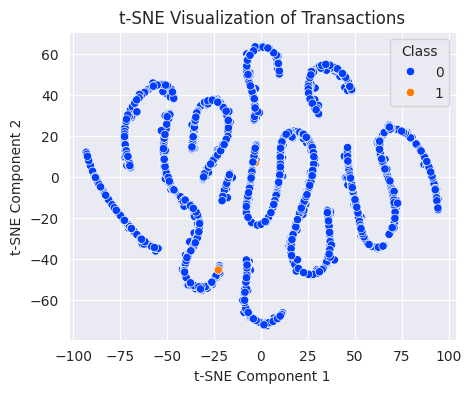

In [ ]:
from sklearn.manifold import TSNE

# Sample a subset of the data for t-SNE due to computational constraints
sample_data = df.sample(n=5000, random_state=42)
sample_features = sample_data.drop(columns=['Class'])
sample_labels = sample_data['Class']

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(sample_features)

plt.figure(figsize=(5, 4))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=sample_labels, palette='bright')
plt.title('t-SNE Visualization of Transactions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

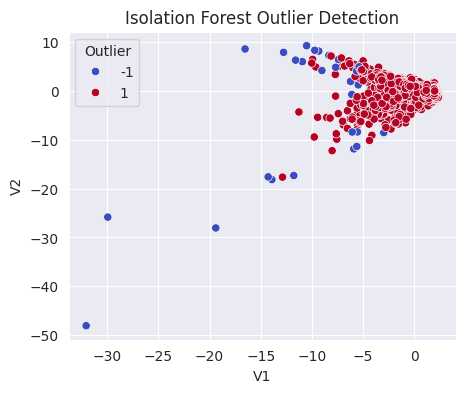

In [ ]:
from sklearn.ensemble import IsolationForest

copy_df = df.copy()
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(copy_df.drop(columns=['Class']))

copy_df['Outlier'] = outliers

plt.figure(figsize=(5, 4))
sns.scatterplot(x='V1', y='V2', hue='Outlier', data=copy_df.sample(n=5000, random_state=42), palette='coolwarm')
plt.title('Isolation Forest Outlier Detection')
plt.show()

## Student Question

1. Describe at least two major challenges in the dataset based on your EDA findings.
2. Analyze the correlation matrix of the features.
3. Is your data linearly separable? Please provide a rationale.

  **Student Answer:** :
1. Based on the EDA findings, two major challenges in the dataset are:
    * Class Imbalance: The dataset is highly imbalanced, with the positive class (frauds) accounting for only 0.172% of all transactions. This imbalance can make it difficult for the model to learn the patterns of the minority class effectively.
        * Solution: Techniques such as oversampling, undersampling, or using class weights can help address this issue.
    * Outliers: The dataset contains outliers, as seen in the scatter plot of V1 and V2 features. These outliers can affect the performance of the model and may need to be addressed during preprocessing.
        * Solution: Outlier detection methods such as Isolation Forest can help identify and handle outliers.

2. The correlation matrix of the features shows that most features have low correlation with each other, indicating that they are not highly linearly related. This can be beneficial for machine learning models that assume feature independence. Also, we observe that some features have a higher correlation with the target variable (Class), suggesting that they may be important for predicting fraud. Moreover, some features have correlations with the Amount and Time features, indicating potential relationships between these training variables(Maybe a dimension reduction technique such as PCA can be applied).<p>

3. The data is not linearly separable due to the high overlap between the two classes in the 2D t-SNE visualization. This suggests that a linear classifier may not be sufficient to separate the classes effectively. Non-linear classifiers such as SVM with a non-linear kernel or ensemble methods may be more suitable for this dataset.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd

data_path = './creditcard.csv'
data = pd.read_csv(data_path)

data_class_0 = data[data['Class'] == 0]
data_class_1 = data[data['Class'] == 1]

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers_class_0 = iso_forest.fit_predict(data_class_0.drop(columns=['Class']))
data_class_0['Outlier'] = outliers_class_0
data_class_0_cleaned = data_class_0[data_class_0['Outlier'] == 1].drop(columns=['Outlier'])

data_cleaned = pd.concat([data_class_0_cleaned, data_class_1])

data_cleaned.head()

data_cleaned.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,...,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000,281963.000000
mean,94824.159003,0.086301,0.025566,0.038048,-0.009592,0.018971,-0.006556,0.000508,0.020344,-0.014846,...,0.002442,0.003300,0.000417,0.000043,-0.001720,0.000713,0.000234,-0.000039,79.990681,0.001745
std,47483.119141,1.673818,1.309611,1.423068,1.388345,1.201001,1.260253,1.020350,0.953886,1.051666,...,0.589895,0.706116,0.442454,0.603819,0.506531,0.481041,0.320319,0.217158,172.515480,0.041736
min,0.000000,-30.552380,-16.597227,-31.103685,-5.683171,-22.105532,-10.470675,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.855355,-8.878665,-4.987659,0.000000,0.000000
25%,54227.000000,-0.893354,-0.590096,-0.858816,-0.846936,-0.679412,-0.766555,-0.548890,-0.204734,-0.642058,...,-0.226196,-0.538262,-0.160721,-0.354014,-0.316348,-0.326222,-0.069945,-0.052451,5.550000,0.000000
50%,84673.000000,0.039496,0.065684,0.192250,-0.022185,-0.049802,-0.276163,0.039847,0.023607,-0.053301,...,-0.029061,0.008254,-0.011500,0.040814,0.015119,-0.051333,0.001480,0.011169,21.960000,0.000000
75%,139331.000000,1.320942,0.795863,1.033834,0.733363,0.612247,0.387855,0.564913,0.325864,0.587603,...,0.184717,0.527852,0.145299,0.438398,0.347894,0.240766,0.089748,0.076848,76.000000,0.000000
max,172792.000000,2.454930,22.057729,4.187811,12.114672,14.170531,10.033923,13.339955,20.007208,7.087641,...,27.202839,8.361985,9.499132,4.022866,3.332320,3.517346,3.479621,5.678671,2930.700000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data_cleaned.drop(columns=['Class'])), columns=data_cleaned.columns[:-1])
data_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,...,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05,2.819630e+05
mean,-1.612791e-17,-1.935349e-17,1.612791e-18,-1.612791e-17,1.612791e-18,1.209593e-17,5.644768e-18,2.096628e-17,1.038234e-17,1.048314e-17,...,-1.391032e-17,-1.249913e-17,5.644768e-18,9.071949e-18,-2.671185e-18,1.532151e-17,2.695125e-17,8.063954e-19,5.140771e-18,9.676745e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.997011e+00,-1.830470e+01,-1.269295e+01,-2.188355e+01,-4.086583e+00,-1.842175e+01,-8.303204e+00,-4.268910e+01,-4.304987e+01,-1.275999e+01,...,-1.506536e+01,-3.865108e+01,-1.259046e+01,-4.351816e+01,-4.697891e+00,-9.436532e+00,-3.858445e+00,-2.771897e+01,-2.296771e+01,-4.636733e-01
25%,-8.549824e-01,-5.852826e-01,-4.701113e-01,-6.302335e-01,-6.031247e-01,-5.815014e-01,-6.030541e-01,-5.384417e-01,-2.359592e-01,-5.963994e-01,...,-3.973370e-01,-3.875916e-01,-7.669600e-01,-3.641935e-01,-5.863644e-01,-6.211449e-01,-6.796415e-01,-2.190932e-01,-2.413568e-01,-4.315022e-01
50%,-2.137850e-01,-2.796277e-02,3.063382e-02,1.083595e-01,-9.070485e-03,-5.726297e-02,-2.139313e-01,3.855470e-02,3.421221e-03,-3.656607e-02,...,-1.131755e-01,-5.340479e-02,7.014772e-03,-2.693537e-02,6.752189e-02,3.324375e-02,-1.081938e-01,3.889335e-03,5.161211e-02,-3.363802e-01
75%,9.373209e-01,7.376212e-01,5.881887e-01,6.997470e-01,5.351375e-01,4.939858e-01,3.129624e-01,5.531492e-01,3.202905e-01,5.728534e-01,...,2.574566e-01,3.089963e-01,7.428695e-01,3.274505e-01,7.259726e-01,6.902143e-01,4.990294e-01,2.794539e-01,3.540571e-01,-2.313235e-02
max,1.642015e+00,1.415108e+00,1.682347e+01,2.916072e+00,8.732902e+00,1.178316e+01,7.967047e+00,1.307343e+01,2.095313e+01,6.753571e+00,...,2.129429e+01,4.611064e+01,1.183757e+01,2.146830e+01,6.662312e+00,6.582119e+00,7.310472e+00,1.086227e+01,2.615014e+01,1.652440e+01


In [ ]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281963 entries, 0 to 281962
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    281963 non-null  float64
 1   V1      281963 non-null  float64
 2   V2      281963 non-null  float64
 3   V3      281963 non-null  float64
 4   V4      281963 non-null  float64
 5   V5      281963 non-null  float64
 6   V6      281963 non-null  float64
 7   V7      281963 non-null  float64
 8   V8      281963 non-null  float64
 9   V9      281963 non-null  float64
 10  V10     281963 non-null  float64
 11  V11     281963 non-null  float64
 12  V12     281963 non-null  float64
 13  V13     281963 non-null  float64
 14  V14     281963 non-null  float64
 15  V15     281963 non-null  float64
 16  V16     281963 non-null  float64
 17  V17     281963 non-null  float64
 18  V18     281963 non-null  float64
 19  V19     281963 non-null  float64
 20  V20     281963 non-null  float64
 21  V21     28

In [ ]:
from sklearn.decomposition import PCA

# Dimensionality Reduction using PCA
pca = PCA(n_components=10)
data_reduced = pd.DataFrame(pca.fit_transform(data_scaled), columns=[f'PC{i+1}' for i in range(10)])

data_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.843200,-2.022916,0.644804,-0.084389,0.123331,-0.037642,0.514217,0.099426,-0.017945,0.218610
1,0.381453,-1.933010,-0.346795,0.264033,-0.191435,-0.130500,-1.204065,-0.102927,0.017677,0.589422
2,3.192725,-0.841667,-0.182776,-0.028653,1.717053,-1.214658,1.248990,1.606742,2.567440,-0.297689
3,1.211485,-1.506608,0.118647,-0.476007,0.146621,0.797279,0.892334,1.002851,0.757961,-2.969205
4,1.083683,-1.270300,1.551012,0.604778,-0.350095,-0.177509,0.554810,-0.043555,-1.246365,0.496604


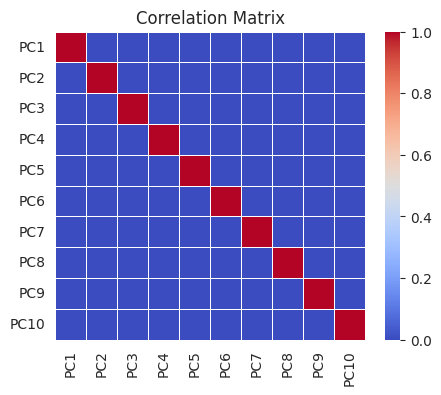

In [ ]:
data_pca_correlation_matrix = data_reduced.corr()

plt.figure(figsize=(5, 4))

sns.heatmap(data_pca_correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Splitting the unpreprocessed data into training and test sets
X_unpreprocessed = data.drop(columns=['Class'])
y_unpreprocessed = data['Class']
X_train_unprep, X_test_unprep, y_train_unprep, y_test_unprep = train_test_split(X_unpreprocessed, y_unpreprocessed, test_size=0.3, random_state=42)

In [ ]:
# Training Logistic Regression on unpreprocessed data
model_unprep = LogisticRegression(max_iter=1000, random_state=42)
model_unprep.fit(X_train_unprep, y_train_unprep)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Splitting the preprocessed data into training and test sets
X_preprocessed = data_reduced
y_preprocessed = data_cleaned['Class']
X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(X_preprocessed, y_preprocessed, test_size=0.3, random_state=42)


In [ ]:
# Training Logistic Regression on preprocessed data
model_prep = LogisticRegression(max_iter=1000, random_state=42)
model_prep.fit(X_train_prep, y_train_prep)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predictions for unpreprocessed data
y_pred_unprep = model_unprep.predict(X_test_unprep)

# Predictions for preprocessed data
y_pred_prep = model_prep.predict(X_test_prep)

Evaluation Report for Unpreparedness Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.65      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



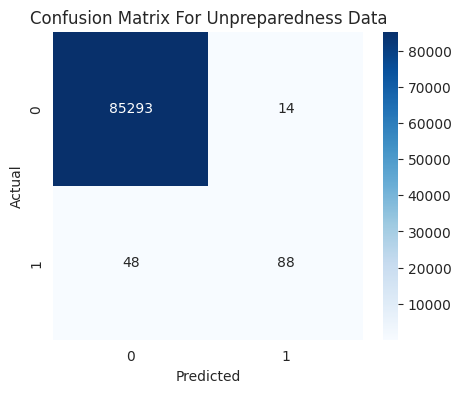

In [ ]:
# Evaluation metrics for preprocessed data
print("Evaluation Report for Unpreparedness Data:")
print(classification_report(y_test_unprep, y_pred_unprep))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_unprep, y_pred_unprep), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Unpreparedness Data')
plt.show()

Evaluation Report for Preprocessed Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84443
           1       0.99      0.62      0.76       146

    accuracy                           1.00     84589
   macro avg       0.99      0.81      0.88     84589
weighted avg       1.00      1.00      1.00     84589



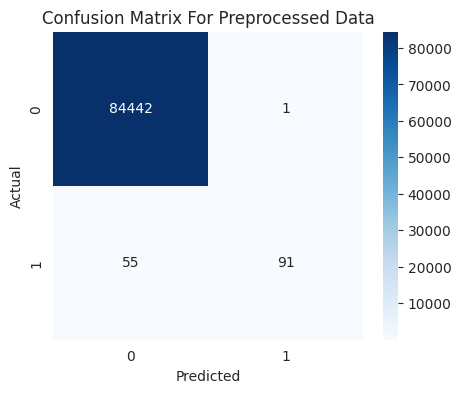

In [ ]:
# Evaluation metrics for preprocessed data
print("Evaluation Report for Preprocessed Data:")
print(classification_report(y_test_prep, y_pred_prep))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_prep, y_pred_prep), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For Preprocessed Data')
plt.show()

**Note:**
In this case, the false-negative rate is crucial because we want to detect as many fraud cases as possible and lose no real frauds. Therefore, we should focus on improving the recall score for the positive class (frauds). As we can see, our preprocessed data has a higher recall score for the positive class compared to the unpreprocessed data. This indicates that the preprocessing steps have helped improve the model's performance in detecting fraud cases.

### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

In [ ]:
# Training SVM on unpreprocessed data
model_unprep_svm = SVC(kernel='linear', random_state=42)
model_unprep_svm.fit(X_train_unprep, y_train_unprep)

SVC(kernel='linear', random_state=42)

In [ ]:
# Training SVM on preprocessed data
model_prep_svm = SVC(kernel='linear', random_state=42)
model_prep_svm.fit(X_train_prep, y_train_prep)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions for unpreprocessed data
y_pred_unprep_svm = model_unprep_svm.predict(X_test_unprep)

# Predictions for preprocessed data
y_pred_prep_svm = model_prep_svm.predict(X_test_prep)

Evaluation Report for SVM Unpreparedness Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.64      0.33      0.44       136

    accuracy                           1.00     85443
   macro avg       0.82      0.67      0.72     85443
weighted avg       1.00      1.00      1.00     85443



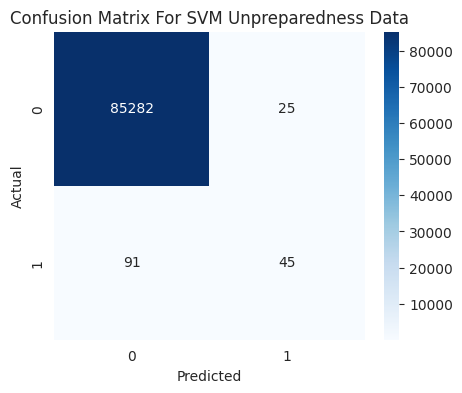

In [ ]:
# Evaluation metrics for preprocessed data
print("Evaluation Report for SVM Unpreparedness Data:")
print(classification_report(y_test_unprep, y_pred_unprep_svm))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_unprep, y_pred_unprep_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For SVM Unpreparedness Data')
plt.show()

Evaluation Report for SVM Preprocessed Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84443
           1       0.99      0.62      0.76       146

    accuracy                           1.00     84589
   macro avg       0.99      0.81      0.88     84589
weighted avg       1.00      1.00      1.00     84589



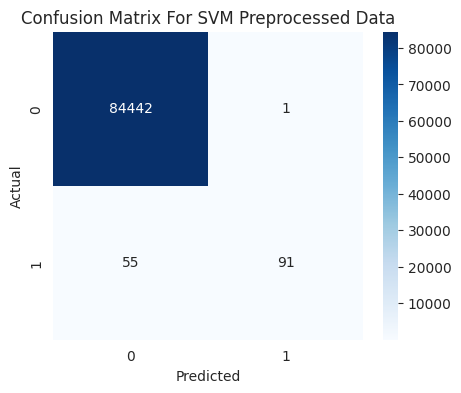

In [ ]:
# Evaluation metrics for preprocessed data
print("Evaluation Report for SVM Preprocessed Data:")
print(classification_report(y_test_prep, y_pred_prep_svm))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_prep, y_pred_prep_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For SVM Preprocessed Data')
plt.show()

In [ ]:
# Training SVM on preprocessed data with non-linear kernel
model_prep_svm_nonlinear = SVC(kernel='rbf', random_state=42)
model_prep_svm_nonlinear.fit(X_train_prep, y_train_prep)

SVC(random_state=42)

In [ ]:
# Predictions for preprocessed data
y_pred_prep_svm_nonlinear = model_prep_svm_nonlinear.predict(X_test_prep)

Evaluation Report for SVM Preprocessed Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84443
           1       0.99      0.66      0.79       146

    accuracy                           1.00     84589
   macro avg       0.99      0.83      0.89     84589
weighted avg       1.00      1.00      1.00     84589



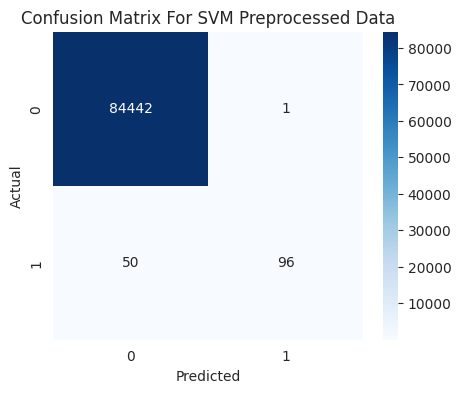

In [ ]:
# Evaluation metrics for preprocessed data
print("Evaluation Report for SVM Preprocessed Data:")
print(classification_report(y_test_prep, y_pred_prep_svm_nonlinear))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test_prep, y_pred_prep_svm_nonlinear), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For SVM Preprocessed Data')
plt.show()

## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?
2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.
3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?


**Student Answer:** :
1. Based on details and results from the evaluation metrics, the SVM model outperformed the Logistic Regression model in terms of recall for the positive class (frauds). The SVM model achieved higher recall scores for both the unpreprocessed and preprocessed data compared to the Logistic Regression model. This indicates that the SVM model was better at detecting fraud cases in the dataset. One reason is that the data that we were working on was not linearly separable, and SVM can handle non-linear data better than Logistic Regression. In conclusion, if the dataset has non-linear patterns or is not linearly separable, SVM generally outperforms Logistic Regression. However, if the dataset is well-preprocessed and linear, Logistic Regression can perform just as well with the added benefit of interpretability. <p></p>
2. No it is not. Imagine a classifier that always predicts the majority class (non-fraud) in this imbalanced dataset. This classifier would achieve a high accuracy due to the class imbalance but would fail to detect any fraud cases (low recall for the positive class). Therefore, accuracy is not a suitable metric for evaluating performance in this problem due to the class imbalance. Instead, metrics such as precision, recall, and F1-score are more suitable for evaluating the model's performance in detecting fraud cases accurately.<p></p>
3. To enhance the recall metric specifically for this dataset, we can consider the following recommendations:
    * **Resampling Techniques:** Use oversampling techniques such as SMOTE to balance the class distribution and provide more examples of the minority class for the model to learn from.
    * **Model Selection:** Experiment with different models, such as ensemble methods (Random Forest, Gradient Boosting), that can handle imbalanced datasets better and may improve recall scores.
    * **Hyperparameter Tuning:** Optimize the hyperparameters of the model, such as the class weights, to give more importance to the minority class and improve recall.
    * **Feature Engineering:** Create new features or select relevant features that can help the model better distinguish between fraud and non-fraud transactions.
    * **Anomaly Detection:** Use unsupervised anomaly detection techniques to identify outliers and potential fraud cases in the dataset.
    * **Ensemble Methods:** Combine multiple models, such as Logistic Regression, SVM, and Random Forest, to leverage the strengths of each model and improve overall performance.
    * **Cross-Validation:** Use cross-validation techniques to evaluate the model's performance on multiple folds of the data and ensure that the model generalizes well to unseen data.
    * **Threshold Adjustment:** Adjust the classification threshold to increase the sensitivity of the model and improve recall at the expense of precision.
    * **Feature Scaling:** Ensure that the features are properly scaled to improve the model's performance and convergence during training.
    * **Regularization:** Apply regularization techniques to prevent overfitting and improve the model's generalization ability.
    * **Feature Selection:** Select the most relevant features that contribute to the prediction of fraud cases and remove irrelevant or redundant features.
    * **Model Interpretability:** Use interpretable models such as Logistic Regression to understand the factors that contribute to fraud detection and make informed decisions based on the model's predictions.
    * **Data Augmentation:** Generate synthetic samples for the minority class using techniques such as SMOTE to balance the class distribution and improve the model's performance.
    * **Model Evaluation:** Evaluate the model's performance using appropriate metrics such as precision, recall, F1-score, and ROC-AUC to assess its effectiveness in detecting fraud cases.
    * **Feature Transformation:** Apply feature transformation techniques such as PCA to reduce the dimensionality of the data and improve the model's performance and training time.
    * **Model Ensembling:** Combine multiple models, such as Logistic Regression, SVM, and Random Forest

Also for this case, modifying the loss function to penalize false negatives more than false positives can help improve the recall metric. In conclusion, to enhance Recall in this dataset, it’s essential to focus on resampling techniques, adjusting the decision threshold, using class weight adjustments, and potentially employing ensemble methods. The goal is to ensure the model identifies as many fraudulent transactions as possible, even at the expense of some increase in false positives.

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

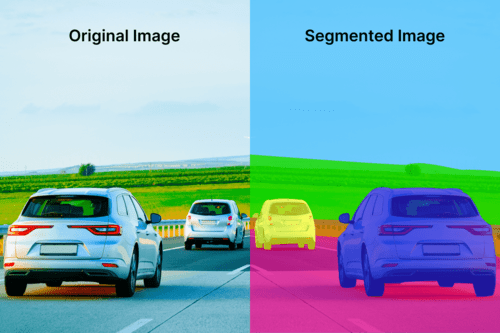

## Load Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

zsh:1: command not found: gdown


In [ ]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


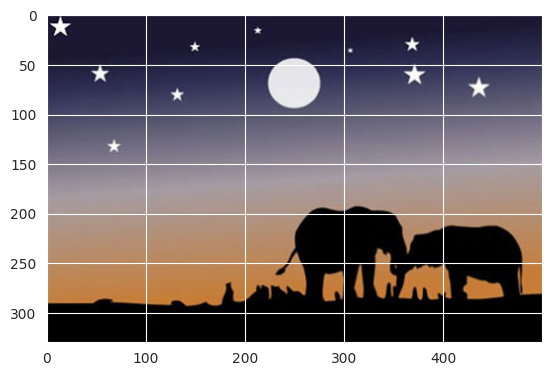

In [ ]:
plt.imshow(im) # as RGB Format
plt.show()

In [ ]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.

In [ ]:
inertia = []
K = range(1, 20)  # Trying with 1 to 20 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=16)
    kmeans.fit(all_pixels)
    inertia.append(kmeans.inertia_)

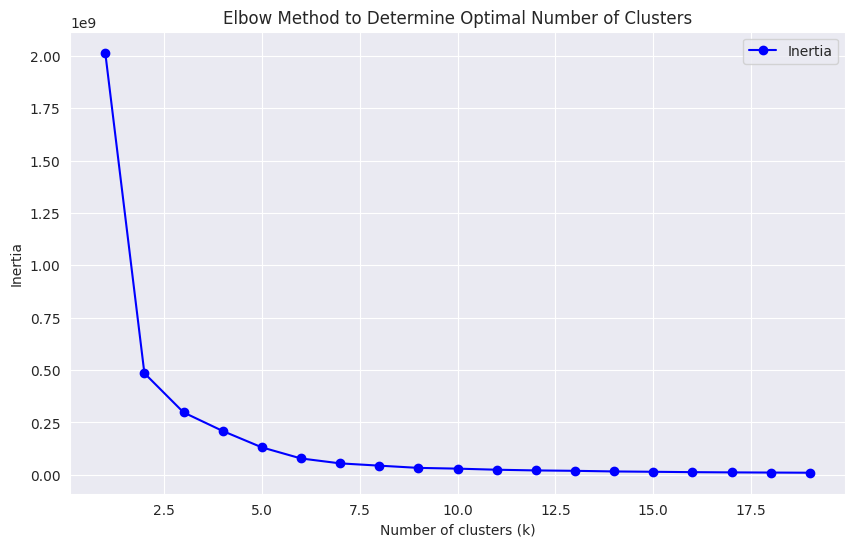

In [ ]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.legend()
plt.show()

## Visualize Dominant Color

In [ ]:
optimal_clusters = 6

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(all_pixels)
dominant_colors = kmeans.cluster_centers_


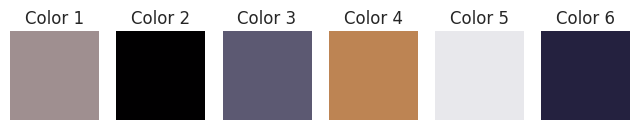

In [ ]:
# Visualize the dominant colors
plt.figure(figsize=(8, 8))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, optimal_clusters, i + 1)
    plt.axis('off')
    plt.imshow(np.zeros((100, 100, 3), dtype='uint8') + color.astype(int))
    plt.title(f'Color {i+1}')
plt.show()

## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


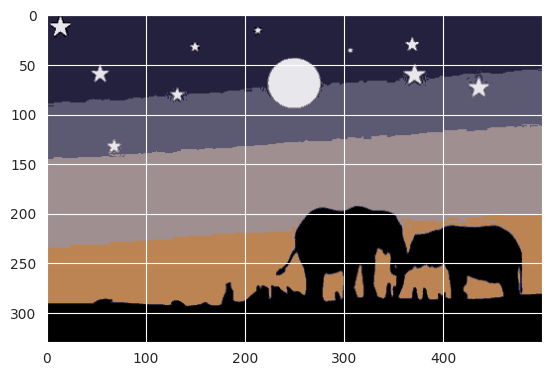

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()